# Part I: Scraping MTG Card Decks


I will be scraping built decks from EDHRec.

In [2]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import re
import time
import pandas as pd
import mtgutilities as mtgu
import json
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.chrome.options import Options
import requests

In [3]:
with open('config.json', 'r') as config_file:
    contents = json.loads(config_file.read())

### Getting all of the expansion URLs

In [8]:
URL = 'https://edhrec.com/'
COLORS = ['w', 'u', 'b', 'g', 'r', 'colorless', 'wu', 'ub', 'br', 'rg', 'gw', 'wb', 'ur', 'bg', 'rw', 'gu', 'wub', 'ubr'\
    'brg', 'rgw', 'gwu', 'wbg', 'uwr', 'bgu', 'rwb', 'gur', 'wubr', 'ubrg', 'brgw', 'rgwu', 'gwub', 'wubrg']
color_urls = [f"{URL}commanders/{commander_color}" for commander_color in COLORS]

In [36]:
colors = {}
for color_url in color_urls:
    # Enter each commander color site, click Text View
    print(color_url)
    chrome_options = webdriver.ChromeOptions()
    opts = Options()
    opts.add_argument("--incognito")
    driver = webdriver.Chrome(contents["chrome-driver-location"], options=opts)
    driver.get(color_url)
    mtgu.click_element_in_href(driver, 'Text View')
    time.sleep(2)

    # Clicking Read More to reveal all commanders
    elements = driver.find_elements(By.CSS_SELECTOR, "button.btn.btn-primary")
    while len(elements)>1:
        try:
            element = driver.find_elements(By.CSS_SELECTOR, "button.btn.btn-primary")[1]
            element.click()
            time.sleep(2)
        except IndexError:
            break
    
    # Scraping Commanders
    a = driver.page_source
    soup = bs(a, features="html.parser")

    commanders_list = []
    for c in soup.find_all('a', href=True):
        if f"/commanders/" in c["href"]:
            commanders_list.append(c['href'][1:])
        
    commanders = {}
    #commanders = ['/krrik-son-of-yawgmoth']
    for commander in commanders_list[1:]:
        decks = {}
        commander_url = f"{URL}decks/{commander[11:]}"
        driver.get(commander_url)
        a = driver.page_source
        soup_commander = bs(a, features="html.parser")

        while True:
            for a in soup_commander.find_all('a', href=True):
                deck_data = {}
                if '/deckpreview/' in a["href"]:
                    deck_id = a["href"]
                    for b in soup_commander.findAll("td"):
                        if deck_id in str(b):
                            deck_data['price'] = b.findNextSibling().text
                            deck_data['tribe'] = b.findNextSibling().findNextSibling().text
                            deck_data['theme'] = b.findNextSibling().findNextSibling().findNextSibling().text
                            decks[deck_id] = deck_data

            if mtgu.check_exists_by_xpath(driver, "//a[contains(text(), 'Next')]"):
                element = driver.find_element(By.XPATH, "//a[contains(text(), 'Next')]")
                driver.execute_script('arguments[0].scrollIntoView();', element)
                driver.execute_script('window.scrollBy(0, -200);')
                element.click()
            else:
                break
        commanders[commander] = decks
    colors[color_url] = commanders

https://edhrec.com/commanders/w


KeyboardInterrupt: 

In [35]:
import json

with open('my_dict.json', 'w') as f:
    json.dump(my_dict, f)

{'https://edhrec.com/commanders/w': {'commanders/giada-font-of-hope': {'/deckpreview/OaDzzyV5vuOVOht-hYxtjg': {'price': '$144',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/InGPrYPBVFEaoqr4mMuWTg': {'price': '$1020',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/92WC64fI_gfIgAx4LFJxaA': {'price': '$436',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/rpkQngizNI_0_PwBAW4Idw': {'price': '$126',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/Fi0snReqhVJNAoElRvYeFQ': {'price': '$119',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/-eS022gORmbRBz9t56dGjQ': {'price': '$697',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/4q7hnkLgF3kwTmsPyvGcIQ': {'price': '$722',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/XasZEx66aaCLr2Aw-pwH_A': {'price': '$679',
    'tribe': 'Angel',
    'theme': ''},
   '/deckpreview/YCmZEcTeNFUgGYviDaMnPA': {'price': '$871',
    'tribe': 'Angel',
    'theme': 'Lifegain'},
   '/deckpreview/6VRVCV

[<td><a href="/deckpreview/OaDzzyV5vuOVOht-hYxtjg">View Decklist</a></td>,
 <td>$144</td>,
 <td>Angel</td>,
 <td></td>,
 <td><span>11.55</span></td>,
 <td><span><img alt="Creature" class="DecksTable_image__23nZf" src="/static/media/creature.b771f4a0.svg" title="Creature"/>25</span></td>,
 <td><span><img alt="Instant" class="DecksTable_image__23nZf" src="/static/media/instant.039e2acd.svg" title="Instant"/>12</span></td>,
 <td><span><img alt="Sorcery" class="DecksTable_image__23nZf" src="/static/media/sorcery.1f289386.svg" title="Sorcery"/>5</span></td>,
 <td><span><img alt="Artifact" class="DecksTable_image__23nZf" src="/static/media/artifact.9a44ec3e.svg" title="Artifact"/>11</span></td>,
 <td><span><img alt="Enchantment" class="DecksTable_image__23nZf" src="/static/media/enchantment.df276914.svg" title="Enchantment"/>7</span></td>,
 <td><span><img alt="Planeswalker" class="DecksTable_image__23nZf" src="/static/media/planeswalker.14ccef1a.svg" title="Planeswalker"/>2</span></td>,
 <td
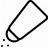
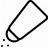
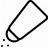
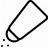
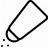
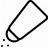
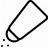
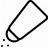
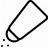
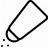

In [23]:
soup_commander.findAll("td")